# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


#create df to clean and put apis frm openweather

cities_weather_df = pd.read_csv(output_data_file)
cities_weather_df_copy = cities_weather_df
cities_weather_df.head()

,Unnamed: 0,City ID,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,0,546105,Nikolskoye,59.70,30.79,33.80,80,90,8.95,RU
1,1,3833367,Ushuaia,-54.80,-68.30,46.40,45,20,31.09,AR
2,2,4030556,Rikitea,-23.12,-134.97,76.08,79,24,7.52,PF
3,3,6170031,Tuktoyaktuk,69.45,-133.04,8.60,84,90,19.46,CA
4,4,5122534,Jamestown,42.10,-79.24,39.99,60,90,26.40,US


In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['ishigaki', 'wahran', 'vaini', 'puerto ayora', 'falmouth', 'warrington', 'east london', 'ola', 'hokitika', 'hasaki', 'avarua', 'airai', 'pouebo', 'poum', 'torbay', 'nanortalik', 'leningradskiy', 'merritt', 'rikitea', 'srednekolymsk', 'ushuaia', 'santa catarina ixtahuacan', 'sentyabrskiy', 'albany', 'tubmanburg', 'khasan', 'port alfred', 'butaritari', 'kenora', 'pisco', 'beloha', 'bandarbeyla', 'severo-kurilsk', 'attawapiskat', 'gat', 'gayny', 'dingle', 'maldonado', 'clyde river', 'jamestown', 'diego de almagro', 'new norfolk', 'ribeira grande', 'bredasdorp', 'palabuhanratu', 'narsaq', 'lorengau', 'chaozhou', 'tromso', 'eyl', 'hilo', 'boende', 'saleaula', 'punta arenas', 'tuktoyaktuk', 'busselton', 'iquitos', 'qaanaaq', 'kodiak', 'rafaela', 'chuy', 'kaili', 'yellowknife', 'port hardy', 'ponta do sol', 'acapulco', 'roblin', 'saskylakh', 'nola', 'qunduz', 'ahuimanu', 'hermanus', 'laguna', 'sabang', 'kazanskaya', 'tezu', 'gazojak', 'geraldton', 'hobart', 'karratha', 'puerto del rosario', 

In [4]:
#Are all elements equal  ...nope missing country marker.  Remove those rows that dont contain country markers
cities_weather_df.count()

Unnamed: 0    546
City ID       546
City          546
Lat           546
Long          546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       540
dtype: int64

In [5]:
#What does the data look like?
cities_weather_df.dtypes

Unnamed: 0      int64
City ID         int64
City           object
Lat           float64
Long          float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
dtype: object

In [6]:
#Drop Country Rows so all elements are equal
cities_weather_df = cities_weather_df.dropna(how='any')
cities_weather_df.count()

Unnamed: 0    540
City ID       540
City          540
Lat           540
Long          540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
dtype: int64

In [7]:
#Building for Loop to build new dataframe with 
cities_weather_df.head()

,Unnamed: 0,City ID,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,0,546105,Nikolskoye,59.70,30.79,33.80,80,90,8.95,RU
1,1,3833367,Ushuaia,-54.80,-68.30,46.40,45,20,31.09,AR
2,2,4030556,Rikitea,-23.12,-134.97,76.08,79,24,7.52,PF
3,3,6170031,Tuktoyaktuk,69.45,-133.04,8.60,84,90,19.46,CA
4,4,5122534,Jamestown,42.10,-79.24,39.99,60,90,26.40,US


In [8]:
#testing url pull, api key and viewing response
from pprint import pprint

from api_keys import weather_api_key

lat = cities_weather_df.iloc[1,6]
lon = cities_weather_df.iloc[1,7]

url =f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=Imperial&appid={weather_api_key}"
    
response = requests.get(url).json()

pprint(response)

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 45, 'lon': 20},
 'dt': 1605512848,
 'id': 784272,
 'main': {'feels_like': 43.79,
          'humidity': 100,
          'pressure': 1020,
          'temp': 45.48,
          'temp_max': 46.4,
          'temp_min': 44.6},
 'name': 'Vojvodina',
 'sys': {'country': 'RS',
         'id': 7030,
         'sunrise': 1605505168,
         'sunset': 1605539427,
         'type': 1},
 'timezone': 3600,
 'visibility': 4000,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 0, 'speed': 1.12}}


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Start getting the weather from the clean dataframe using openweatherapi 
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
# n_city_id = response['cod']

n_city_name = []
n_lon = []
n_lat = []
n_max_temp = []
n_humidity = []
n_cloudiness = []
n_wind_speed = []
n_country = []
n_date = []

from pprint import pprint

from api_keys import weather_api_key

for index, row in cities_weather_df.iterrows():
    lat = row['Lat']
    lon = row['Long']
    
    api_w_key = weather_api_key
    
    url =f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid={api_w_key}"
    
    response = requests.get(url).json()
    
    n_city_id = response['id']
    city=response['name']
    
    print(f'The city code for {city} is {n_city_id}')
    
    n_city_name.append(response['name'])
    n_lat.append(response['coord']['lat'])
    n_lon.append(response['coord']['lon'])
    n_max_temp.append(response['main']['temp_max'])
    n_humidity.append(response['main']['humidity'])
    n_cloudiness.append(response['clouds']['all'])
    n_wind_speed.append(response['wind']['speed'])
    n_country.append(response['sys']['country'])
    n_date.append(response['dt'])
    

The city code for Ul'yanovka is 479140
The city code for Ushuaia is 3833367
The city code for Rikitea is 4030556
The city code for Tuktoyaktuk is 6170031
The city code for Jamestown is 5122534
The city code for Busselton is 2075265
The city code for Castro is 3466704
The city code for Punta Arenas is 3874787
The city code for Saint George is 5546220
The city code for Puerto Ayora is 3652764
The city code for Kavieng is 2094342
The city code for Port-Gentil is 2396518
The city code for Oistins is 3373652
The city code for Hermanus is 3366880
The city code for Matagami is 6067747
The city code for Chui is 3443061
The city code for Balclutha is 2208248
The city code for Lagoa is 3372964
The city code for Mar del Plata is 3430863
The city code for Mollendo is 3934707
The city code for Ainaro is 1651810
The city code for Atuona is 4020109
The city code for Kapaa is 5848280
The city code for Shimoda is 1852357
The city code for Butaritari is 2110227
The city code for Ambon City is 1651531
Th

The city code for Cockburn Town is 3576994
The city code for Geraldton is 2070998
The city code for Beringovskiy is 2126710
The city code for Anshun is 1817968
The city code for Tokoroa is 2180995
The city code for Sisimiut is 3419842
The city code for Portland is 5746545
The city code for Fougamou is 2400578
The city code for Purpe is 1539210
The city code for Hancheng is 1788522
The city code for Killybegs is 2963295
The city code for Sioux Lookout is 6148373
The city code for Muzhi is 1498161
The city code for Caconda is 3351380
The city code for Dikson is 1507390
The city code for Mandalgovi is 2030065
The city code for Ang Thong is 1621034
The city code for Tarawa is 2110257
The city code for Griffith is 4920986
The city code for Varkaus is 632370
The city code for Kavaratti is 1267390
The city code for Vallenar is 3868633
The city code for Buraidah is 107304
The city code for Mandan is 5690366
The city code for Porto Nacional is 3452711
The city code for Gawler is 2071059
The cit

The city code for Axum is 344420
The city code for Norman Wells is 6089245
The city code for Noyabrsk is 1496503
The city code for Cumberland is 4462716
The city code for Vostok is 2013279
The city code for Mexico is 1699805
The city code for Romans-sur-Isère is 2983011
The city code for Kelo is 2430506
The city code for Thinadhoo is 1337610
The city code for Baykit is 1510689
The city code for Chifeng is 2038067
The city code for São João da Barra is 3448903
The city code for Puri is 1259184
The city code for Sur is 286245
The city code for Westport is 4845585
The city code for Gandorhun is 2409215
The city code for Saint-Pierre is 935214
The city code for Tighina is 618577
The city code for Dzilam González is 3529654
The city code for Kimbe is 2093967
The city code for Kondinskoye is 1502697
The city code for Ayr is 2656708
The city code for Nisab is 72181
The city code for Baiquan is 2038541
The city code for Flora is 3156987
The city code for Sindor is 492860
The city code for Stor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Convert Data to DF City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date

n_cities_weather_df = pd.DataFrame({'City': n_city_name , 'Lat': n_lat, 'Long': n_lon,
                                  'Max Temp': n_max_temp, 'Humidity': n_humidity, 'Cloudiness': n_cloudiness,
                                  'Wind Speed': n_wind_speed, 'Country': n_country, 'Date': n_date})
n_cities_weather_df.count()

City          540
Lat           540
Long          540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [14]:
n_cities_weather_df.to_csv("output_data/cities_1.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
n_cities_weather_df.index
n_cities_weather_df['Wind Speed'].min()

0.34

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = n_cities_weather_df.loc[n_cities_weather_df['Humidity']< 100]
print(clean_city_data['Humidity'].max())
print(clean_city_data['Humidity'].count())

99
523


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [17]:
clean_city_data.head(0)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


<Figure size 432x288 with 0 Axes>

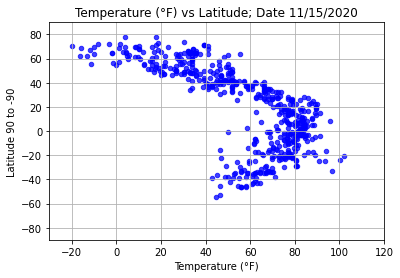

'The horizontal Zero off the y axis represents the equator and as the grid moves further from zero, in either direction, temperatures begin to decrease.'

In [18]:
plt.figure()
fig = clean_city_data.plot.scatter('Max Temp', 'Lat', color='blue', alpha = .75, grid = True)
plt.title('Temperature (°F) vs Latitude; Date 11/15/2020')
plt.xlabel('Temperature (°F)')
plt.ylabel('Latitude 90 to -90')
plt.xlim(-30,120)
plt.ylim(-90, 90)
plt.savefig("temp_v_lat.png")
plt.show()

'''The horizontal Zero off the y axis represents the equator and as the grid moves further from zero, in either direction, temperatures begin to decrease.'''

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

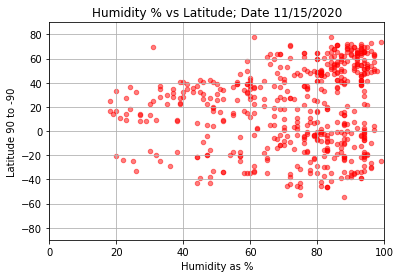

'Humidity is fairly evenly distributed around horizonal zero, but has a significant cluster of points in the 60 degree with over 80% humidity.'

In [19]:
plt.figure()
fig = clean_city_data.plot.scatter('Humidity', 'Lat', color='red', alpha=0.5, grid=True)
plt.title('Humidity % vs Latitude; Date 11/15/2020')
plt.xlabel('Humidity as %')
plt.ylabel('Latitude 90 to -90')
plt.xlim(0, 100)
plt.ylim(-90, 90)
plt.savefig("humidity_v_lat.png")
plt.show()

'''Humidity is fairly evenly distributed around horizonal zero, but has a significant cluster of points in the 60 degree with over 80% humidity.'''

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

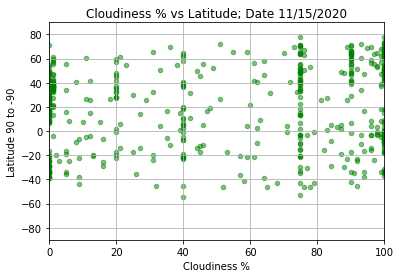

' Cloudiness is even distributed along the horizontal zero line.  No discernable points or clusters.'

In [20]:
plt.figure()
fig = clean_city_data.plot.scatter('Cloudiness', 'Lat', color='green', alpha=0.5, grid=True)
plt.title('Cloudiness % vs Latitude; Date 11/15/2020')
plt.xlabel('Cloudiness %')
plt.ylabel('Latitude 90 to -90')
plt.xlim(0, 100)
plt.ylim(-90, 90)
plt.savefig("cloud_v_lat.png")
plt.show()


''' Cloudiness is even distributed along the horizontal zero line.  No discernable points or clusters.'''

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

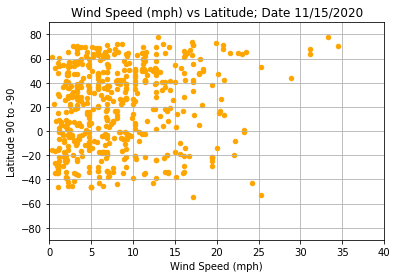

'Wind speed is even distributed between 0 and 10 and along the horizontal zero line.  A few high wind speeds, above 30, occur further away from zero.'

In [21]:
plt.figure()
fig = clean_city_data.plot.scatter('Wind Speed', 'Lat', color='orange', alpha=1, grid=True)
plt.title('Wind Speed (mph) vs Latitude; Date 11/15/2020')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude 90 to -90')
plt.xlim(0, 40)
plt.ylim(-90, 90)
plt.savefig("wind_v_lat.png")
plt.show()


'''Wind speed is even distributed between 0 and 10 and along the horizontal zero line.  A few high wind speeds, above 30, occur further away from zero.'''

## Linear Regression

In [22]:
clean_city_data.head(1)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ul'yanovka,59.7,30.79,33.8,80,90,11.18,RU,1605512901


In [23]:
s_hemi = clean_city_data.loc[clean_city_data['Lat']<=0]
s_hemi['Lat'].max()

-0.32

In [24]:
n_hemi = clean_city_data.loc[clean_city_data['Lat']>=0]
n_hemi['Lat'].min()

0.53

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

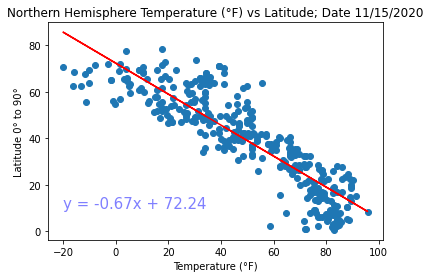

'Strong relationship between Latitude and Temperature. As temperature increase, the closer to zero y-axis points get.'

In [25]:
#Using .loc to segment Latitude points greater than zero
x_values = n_hemi['Max Temp']
y_values =  n_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="blue", alpha=0.5)
plt.title('Northern Hemisphere Temperature (°F) vs Latitude; Date 11/15/2020')
plt.xlabel('Temperature (°F)')
plt.ylabel('Latitude 0° to 90°')
plt.show()

'''Strong relationship between Latitude and Temperature. As temperature increase, the closer to zero y-axis points get.'''

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

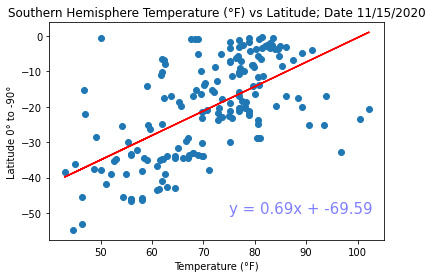

'Slight relationship between Latitude and Temperature. As temperature increases the closer to zero y-axis and closer to the equator.'

In [26]:
x_values = s_hemi['Max Temp']
y_values =  s_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,-50),fontsize=15,color="blue", alpha=0.5)
plt.title('Southern Hemisphere Temperature (°F) vs Latitude; Date 11/15/2020')
plt.xlabel('Temperature (°F)')
plt.ylabel('Latitude 0° to -90°')
plt.show()

'''Slight relationship between Latitude and Temperature. As temperature increases the closer to zero y-axis and closer to the equator.'''

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

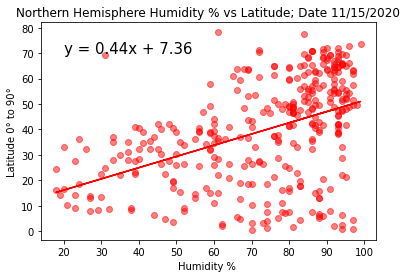

'Little relationship between Latitude and Humidity. As latitude increases and moves any\nfrom zero, humidity is scattered above and below the linear regression line.'

In [27]:
x_values = n_hemi['Humidity']
y_values =  n_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='red', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,70),fontsize=15,color="black", alpha=1)
plt.title('Northern Hemisphere Humidity % vs Latitude; Date 11/15/2020')
plt.xlabel('Humidity % ')
plt.ylabel('Latitude 0° to 90°')
plt.show()

'''Little relationship between Latitude and Humidity. As latitude increases and moves any
from zero, humidity is scattered above and below the linear regression line.'''

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

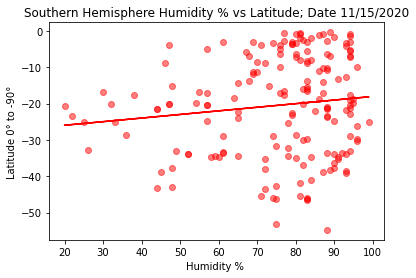

'Little relationship between Latitude and Humidity. As latitude increases and moves any\nfrom zero, humidity is scattered above and below the linear regression line.'

In [28]:
x_values = s_hemi['Humidity']
y_values =  s_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='red', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-5),fontsize=15,color="black", alpha=1)
plt.title('Southern Hemisphere Humidity % vs Latitude; Date 11/15/2020')
plt.xlabel('Humidity % ')
plt.ylabel('Latitude 0° to -90°')
plt.show()

'''Little relationship between Latitude and Humidity. As latitude increases and moves any
from zero, humidity is scattered above and below the linear regression line.'''

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

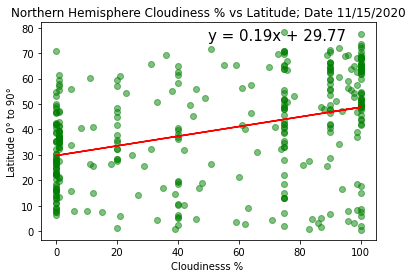

"Little relationship between Latitude and cloudiness. As latitude increases and moves any\nfrom zero, cloudiness is scattered above and below the linear regression line and at it's end points."

In [29]:
x_values = n_hemi['Cloudiness']
y_values =  n_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='green', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,75),fontsize=15,color="black", alpha=1)
plt.title('Northern Hemisphere Cloudiness % vs Latitude; Date 11/15/2020')
plt.xlabel('Cloudinesss % ')
plt.ylabel('Latitude 0° to 90°')
plt.show()

'''Little relationship between Latitude and cloudiness. As latitude increases and moves any
from zero, cloudiness is scattered above and below the linear regression line and at it's end points.'''

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

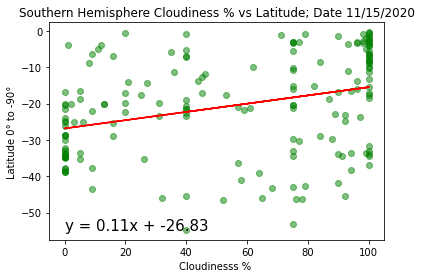

"Almost zero relationship between Latitude and cloudiness. As latitude increases and moves any\nfrom zero, cloudiness is scattered above and below the linear regression line and at it's end points."

In [30]:
x_values = s_hemi['Cloudiness']
y_values =  s_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='green', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-55),fontsize=15,color="black", alpha=1)
plt.title('Southern Hemisphere Cloudiness % vs Latitude; Date 11/15/2020')
plt.xlabel('Cloudinesss % ')
plt.ylabel('Latitude 0° to -90°')
plt.show()

'''Almost zero relationship between Latitude and cloudiness. As latitude increases and moves any
from zero, cloudiness is scattered above and below the linear regression line and at it's end points.'''

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

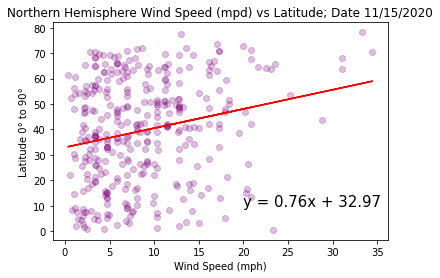

'Slight relationship between Latitude and wind speed. As latitude increases and moves any\nfrom zero, wind is scattered above and below the linear regression line between 0 and 10 mph.'

In [31]:
x_values = n_hemi['Wind Speed']
y_values =  n_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='purple', alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="black", alpha=1)
plt.title('Northern Hemisphere Wind Speed (mpd) vs Latitude; Date 11/15/2020')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude 0° to 90°')
plt.show()

'''Slight relationship between Latitude and wind speed. As latitude increases and moves any
from zero, wind is scattered above and below the linear regression line between 0 and 10 mph.'''

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

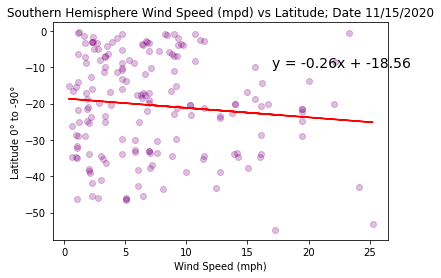

'Slight relationship between Latitude and wind speed. As latitude increases and moves any\nfrom zero, wind is scattered above and below the linear regression line between 0 and 10 mph.'

In [32]:
x_values = s_hemi['Wind Speed']
y_values =  s_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='purple', alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17, -10),fontsize=14,color="black", alpha=1)
plt.title('Southern Hemisphere Wind Speed (mpd) vs Latitude; Date 11/15/2020')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude 0° to -90°')
plt.show()

'''Slight relationship between Latitude and wind speed. As latitude increases and moves any
from zero, wind is scattered above and below the linear regression line between 0 and 10 mph.'''